In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import base64
import string
import re
from collections import Counter
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [2]:
df = pd.read_csv('7282_1.csv')
df.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN


In [3]:
df = df[['name','reviews.text']]

In [4]:
df.head()

,name,reviews.text
0,Hotel Russo Palace,Pleasant 10 min walk along the sea front to th...
1,Hotel Russo Palace,Really lovely hotel. Stayed on the very top fl...
2,Hotel Russo Palace,Ett mycket bra hotell. Det som drog ner betyge...
3,Hotel Russo Palace,We stayed here for four nights in October. The...
4,Hotel Russo Palace,We stayed here for four nights in October. The...


In [5]:
df.shape

(35912, 2)

In [6]:
df.head(15)

,name,reviews.text
0,Hotel Russo Palace,Pleasant 10 min walk along the sea front to th...
1,Hotel Russo Palace,Really lovely hotel. Stayed on the very top fl...
2,Hotel Russo Palace,Ett mycket bra hotell. Det som drog ner betyge...
3,Hotel Russo Palace,We stayed here for four nights in October. The...
4,Hotel Russo Palace,We stayed here for four nights in October. The...
5,Hotel Russo Palace,We loved staying on the island of Lido! You ne...
6,Hotel Russo Palace,Lovely view out onto the lagoon. Excellent vie...
7,Hotel Russo Palace,ottimo soggiorno e ottima sistemazione nei gio...
8,Hotel Russo Palace,Gnstiger Ausgangspunkt fr Venedig Besuche. Ruh...
9,Hotel Russo Palace,Lidoen er perfekt til et par dages ro og afsla...


In [7]:
df.isnull().sum()

name             0
reviews.text    22
dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.33, random_state=46)
print('Reviews text sample:', train['reviews.text'].iloc[0])
print('Hotel reviewed:', train['name'].iloc[0])
print('Training Data Shape:', train.shape)
print('Testing Data Shape:', test.shape)

Reviews text sample: Had such a lovely holiday we had fun at the theme park and water park was amazing and also could relax at the pool and beach down the road, just wished there was a bus to the beach still on even tho children were back at school! That's the only issue.
Hotel reviewed: Hotel Portaventura
Training Data Shape: (24061, 2)
Testing Data Shape: (11851, 2)


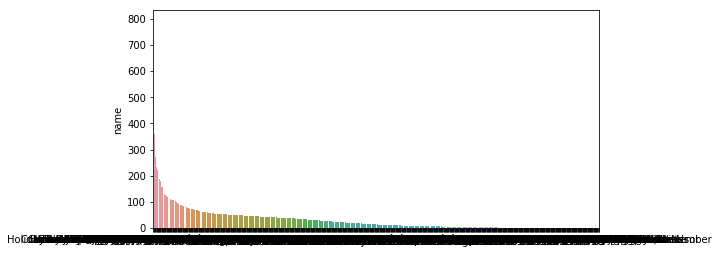

In [12]:
fig = plt.figure(figsize=(8,4))
sns.barplot(x = train['name'].unique(), y=train['name'].value_counts())
plt.show()

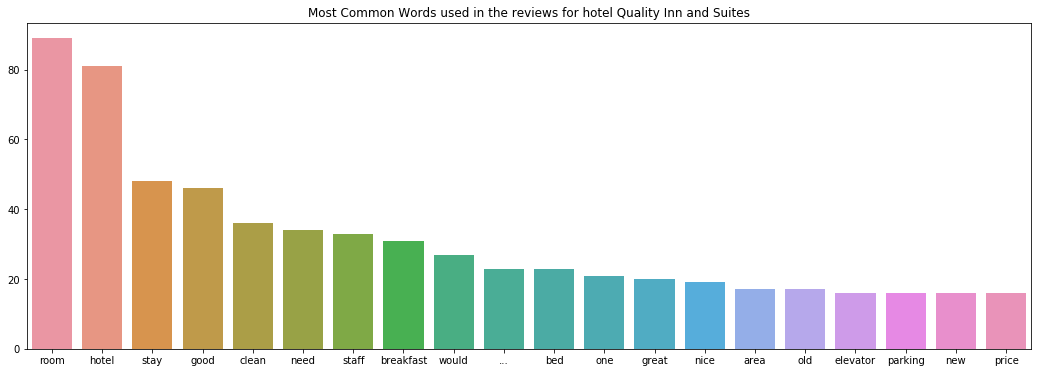

In [14]:
import spacy

nlp = spacy.load('en_core_web_sm')
punctuations = string.punctuation

def cleanup_text(docs, logging=False):
    texts = []
    counter = 1
    for doc in docs:
        if counter % 1000 == 0 and logging:
            print("Processed %d out of %d documents." % (counter, len(docs)))
        counter += 1
        doc = nlp(doc, disable=['parser', 'ner'])
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
        tokens = [tok for tok in tokens if tok not in stopwords and tok not in punctuations]
        tokens = ' '.join(tokens)
        texts.append(tokens)
    return pd.Series(texts)

QUALITY_text = [text for text in train[train['name'] == 'Quality Inn and Suites']['reviews.text']]

WESTERN_text = [text for text in train[train['name'] == 'Best Western Hospitality Hotel and Suites']['reviews.text']]

QUALITY_clean = cleanup_text(QUALITY_text)
QUALITY_clean = ' '.join(QUALITY_clean).split()

WESTERN_clean = cleanup_text(WESTERN_text)
WESTERN_clean = ' '.join(WESTERN_clean).split()

QUALITY_counts = Counter(QUALITY_clean)
WESTERN_counts = Counter(WESTERN_clean)

QUALITY_common_words = [word[0] for word in QUALITY_counts.most_common(20)]
QUALITY_common_counts = [word[1] for word in QUALITY_counts.most_common(20)]

fig = plt.figure(figsize=(18,6))
sns.barplot(x=QUALITY_common_words, y=QUALITY_common_counts)
plt.title('Most Common Words used in the reviews for hotel Quality Inn and Suites')
plt.show()

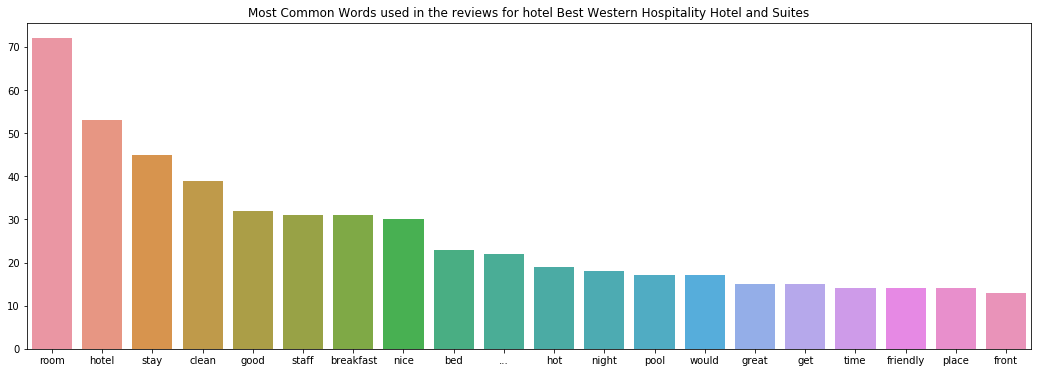

In [15]:
WESTERN_common_words = [word[0] for word in WESTERN_counts.most_common(20)]
WESTERN_common_counts = [word[1] for word in WESTERN_counts.most_common(20)]

fig = plt.figure(figsize=(18,6))
sns.barplot(x=WESTERN_common_words, y=WESTERN_common_counts)
plt.title('Most Common Words used in the reviews for hotel Best Western Hospitality Hotel and Suites')
plt.show()